In [2]:
# CAP6619 Deep Learning Summer 2024 - CNNImageClassification.ipynb
# Benjamin Luo
# 6/9/2024
#
# CNN Image Classification
# Dog vs. Cat classifiction
# Downloaded data from https://www.kaggle.com/c/dogs-vs-cats/data
# For training set, used cat/dog 1-500, 3001-3500
# For test set, used cat/dog 1501-2000, 4000-4499
# For validation set, used cat/dog 1001-1500

In [24]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

folder = "dogvscat/"

In [4]:
def displayImages(foldername, dogorcat, startID):
    for i in range(9):
        plt.subplot(330+1+i)
        filename = foldername + dogorcat + "." + str(i+startID) + ".jpg"
        image = imread(filename)
        plt.imshow(image)
    
plt.show()

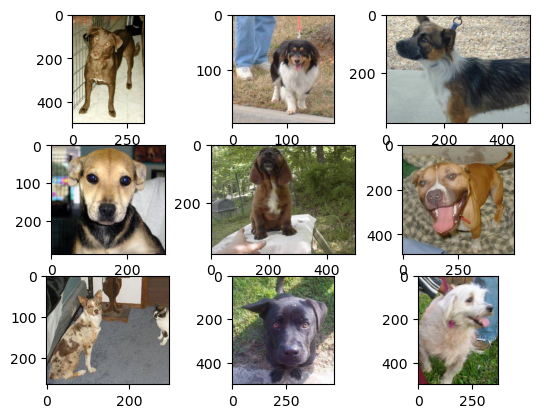

In [5]:
displayImages(folder+"train/dog/", "dog", 1)

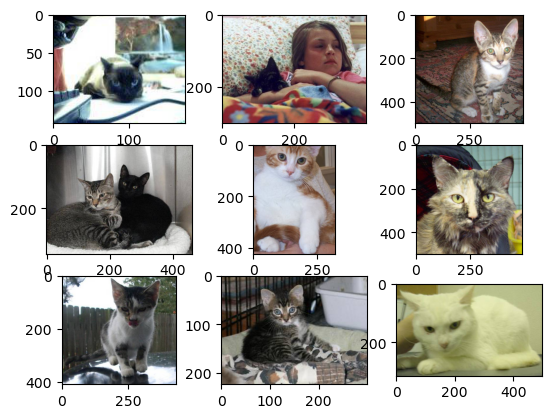

In [6]:
displayImages(folder+"train/cat/", "cat", 5)

In [7]:
training_data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [12]:
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
img = load_img(folder+'train/dog/dog.1.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in training_data_generator.flow(x, batch_size=1, save_to_dir='previews', save_prefix='dog', save_format='jpeg'):
    i += 1
    if i > 10:
        break

In [13]:
training_data_dir=folder+'train/'
validation_data_dir=folder+'validation/'
test_data_dir=folder+'test/'
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
BATCH_SIZE=20

training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
# Create a CNN classifier with at least 3 conv layers, 2 pooling layers, and two dense layers.

model = Sequential()
model.add(Conv2D(32, (3,3),activation='relu', input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 16928)             0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [16]:
# Train the network on the training set, and report the performance of the classifier on the test set

EPOCHS=20
history = model.fit(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data= validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

Epoch 1/20
100/100 [==============================] - 52s 506ms/step - loss: 0.7286 - accuracy: 0.5065 - val_loss: 0.6853 - val_accuracy: 0.5230
Epoch 2/20
100/100 [==============================] - 29s 286ms/step - loss: 0.7001 - accuracy: 0.5135 - val_loss: 0.6853 - val_accuracy: 0.5800
Epoch 3/20
100/100 [==============================] - 29s 288ms/step - loss: 0.7009 - accuracy: 0.5455 - val_loss: 0.6607 - val_accuracy: 0.5960
Epoch 4/20
100/100 [==============================] - 30s 300ms/step - loss: 0.6976 - accuracy: 0.5295 - val_loss: 0.6585 - val_accuracy: 0.6170
Epoch 5/20
100/100 [==============================] - 30s 295ms/step - loss: 0.6925 - accuracy: 0.5330 - val_loss: 0.8105 - val_accuracy: 0.5020
Epoch 6/20
100/100 [==============================] - 30s 296ms/step - loss: 0.6941 - accuracy: 0.5575 - val_loss: 0.6479 - val_accuracy: 0.6510
Epoch 7/20
100/100 [==============================] - 30s 297ms/step - loss: 0.6887 - accuracy: 0.5545 - val_loss: 0.6456 - val_ac

In [18]:
_, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=0)
print('Test Accuracy: %.3f%%' % (acc * 100.0))

Test Accuracy: 63.450%


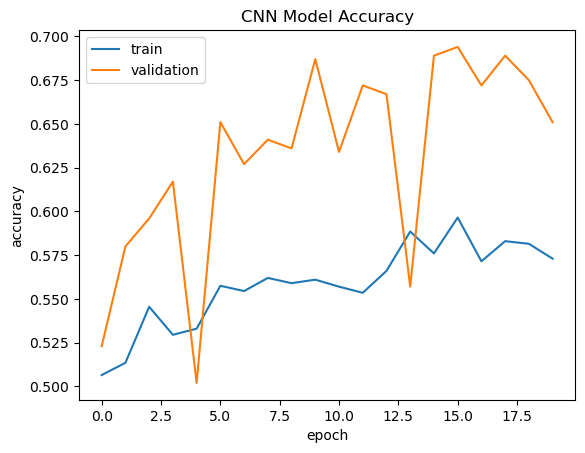

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
# Create a CNN classifier with at least 3 conv layers, 2 pooling layers, and two dense layers.

model = Sequential()
model.add(Conv2D(32, (3,3),activation='relu', input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 32)      

In [26]:
# Train the network on the training set, and report the performance of the classifier on the test set

EPOCHS=20
history = model.fit(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data= validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

Epoch 1/20
100/100 [==============================] - 31s 302ms/step - loss: 0.8511 - accuracy: 0.5165 - val_loss: 0.7393 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 30s 301ms/step - loss: 0.7098 - accuracy: 0.5165 - val_loss: 0.6823 - val_accuracy: 0.5460
Epoch 3/20
100/100 [==============================] - 29s 287ms/step - loss: 0.7118 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 4/20
100/100 [==============================] - 31s 306ms/step - loss: 0.7596 - accuracy: 0.5100 - val_loss: 12.2248 - val_accuracy: 0.5120
Epoch 5/20
100/100 [==============================] - 33s 329ms/step - loss: 0.6928 - accuracy: 0.4980 - val_loss: 2.5046 - val_accuracy: 0.5160
Epoch 6/20
100/100 [==============================] - 29s 290ms/step - loss: 0.7419 - accuracy: 0.5315 - val_loss: 1.4176 - val_accuracy: 0.5040
Epoch 7/20
100/100 [==============================] - 29s 294ms/step - loss: 0.6996 - accuracy: 0.4905 - val_loss: 2.0283 - val_a

In [27]:
_, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=0)
print('Test Accuracy: %.3f%%' % (acc * 100.0))

Test Accuracy: 50.250%


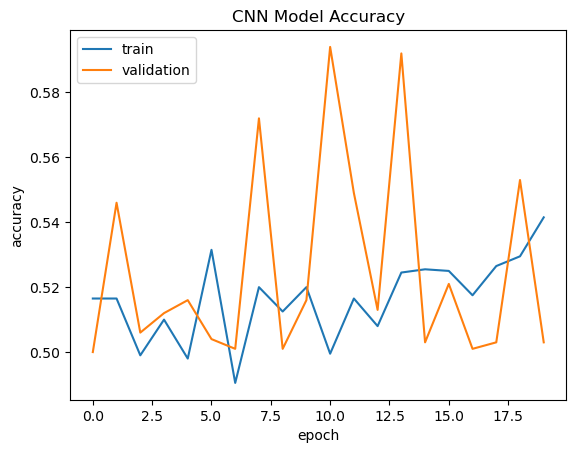

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()